In [2]:
import pandas as pd
import numpy as np
import datetime
import json, ijson
import matplotlib.pyplot as plt

# Offline Sales

Esta parte do código será referente à análise das vendas na loja física. Sendo assim, todas as variáveis criadas terminarão com a silga **ofs** para facilitar a identificação e escrita do código.

In [89]:
# Descobrir o número de linhas do arquivo
number_lines_ofs = 0
with open('offline_sales/offline_sales.json') as f:
    for line in f:
        number_lines_ofs = number_lines_ofs+1

print("O número de linhas presente no arquivo ofs é igual a:", number_lines_ofs)

O número de linhas presente no arquivo ofs é igual a: 29372


In [58]:
# Abrindo o arquivo json
df_ofs = pd.read_json('offline_sales/offline_sales.json',lines=True,dtype=False)

# Criando uma coluna que será útil depois
df_ofs['price_quantity'] = df_ofs['price'] * df_ofs['quantity'] 

# Verificação das primeiras linhas
df_ofs.head(10)
# type(df_ofs)

,customer_id,date,off_product_id,price,quantity,sale_id,state,store_id,price_quantity
0,None,2018-08-01,643839313230323,279.0,1,323932636465316,RN,3162633,279.0
1,None,2018-08-01,613665646663346,229.0,1,326463633336323,RN,3162633,229.0
2,None,2018-08-01,343739666265353,179.0,1,333331346330323,RN,3162633,179.0
3,None,2018-08-01,373034633762613,269.0,1,393461383633336,RN,3162633,269.0
4,None,2018-08-01,343634373062363,29.0,1,616531626536373,RN,3162633,29.0
5,None,2018-08-01,616339353035393,459.0,1,626462353638383,RN,3162633,459.0
6,None,2018-08-01,346165376638356,369.0,1,653363623539323,RN,3162633,369.0
7,30373934343338363136,2018-08-01,643839313363376,149.0,1,666639323036376,RN,3162633,149.0
8,30393833353363303832,2018-08-01,333835396465353,198.0,1,636238633865636,RN,3162633,198.0
9,31366262653431626130,2018-08-01,343332613639373,229.0,1,626239383061353,RN,3162633,229.0


### Análise do faturamento

#### Faturamento total 

In [61]:
# Somando o faturamento em lojas físicas
income_ofs = df_ofs['price_quantity'].sum()

print("O faturamento das lojas físicas nesse período foi de: R$", income_ofs)

O faturamento das lojas físicas nesse período foi de: R$ 13903005.32


#### Faturamento por região

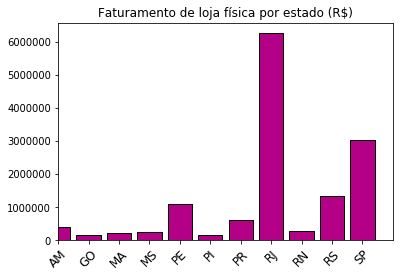

In [5]:
df_income_state_ofs = df_ofs.drop(['customer_id','date', 'off_product_id', 'sale_id', 
                                  'store_id'], axis=1)

g_income_state_ofs = df_income_state_ofs.groupby('state')['price_quantity'].sum()

# Plot
my_index = tuple(g_income_state_ofs.index)
values = g_income_state_ofs.values
plt.bar(np.arange(11),values, color="#b30086", ec='black') 
plt.xticks(np.arange(0, 11, 1), my_index, rotation=45, fontsize=12)
plt.xlim(0, 11)
plt.title("Faturamento de loja física por estado (R$)")
plt.show() 


### Análise para entender o que significa store_id

In [68]:
# Descobrindo o número de estados e de store_id existentes na tabela analisada
unique_states_ofs = df_ofs['state'].unique()
print('Número de estados presentes no arquivo:',len(unique_states_ofs))

unique_store_id_ofs = df_ofs['store_id'].unique()
print('Número de store_id presentes no arquivo:',len(unique_store_id_ofs))

# Analisando quantos store_id existem por estado
g_store_state_ofs = df_ofs.groupby('state')
g_store_state_ofs = g_store_state_ofs.apply(lambda s: len(s['store_id'].unique()))
print("\nNúmero de store_id por estado:\n",g_store_state_ofs)

Número de estados presentes no arquivo: 11
Número de store_id presentes no arquivo: 39

Número de store_id por estado:
 state
AM     2
GO     1
MA     1
MS     1
PE     3
PI     1
PR     3
RJ    13
RN     1
RS     3
SP    10
dtype: int64


### Análise sobre quantidade de lojas físicas por estado

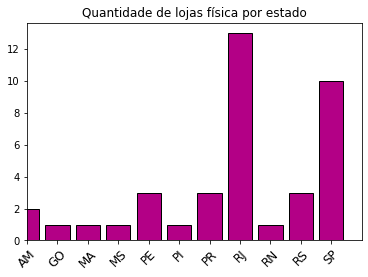

In [63]:
# Plot
my_index = tuple(g_income_state_ofs.index)
values = g_store_state_ofs.values
plt.bar(np.arange(11),values, color="#b30086", ec='black') 
plt.xticks(np.arange(0, 11, 1), my_index, rotation=45, fontsize=12)
plt.xlim(0, 11)
plt.title("Quantidade de lojas física por estado")
plt.show() 

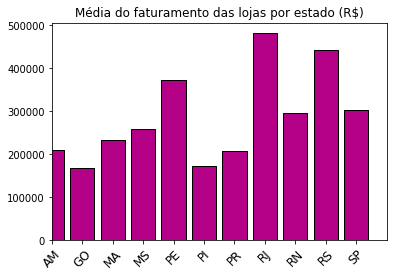

In [69]:
# Considerando o número de lojas por estado e analisando o faturamento por estado novamente

# Plot
my_index = tuple(g_income_state_ofs.index)
values = g_income_state_ofs.values/g_store_state_ofs.values
plt.bar(np.arange(11),values, color="#b30086", ec='black') 
plt.xticks(np.arange(0, 11, 1), my_index, rotation=45, fontsize=12)
plt.xlim(0, 11)
plt.title("Média do faturamento das lojas por estado (R$)")
plt.show() 


### Análise sobre os cariocas gostarem de comprar no final de semana

C:\Users\guima\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


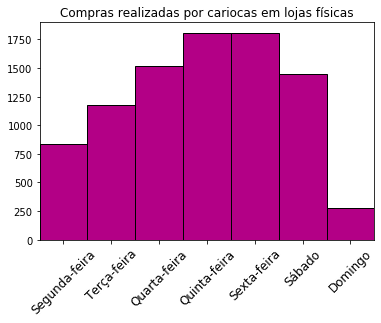

O número de compras realizadas por cariocas em lojas físicas nos finais de semana é igual a: 1723
O número de compras realizadas por cariocas em lojas físicas nos dias de semana é igual a: 7144


In [9]:
# Analisando as linhas em que o estado é igual a RJ e criando mais uma coluna referente ao dia da semana
df_state_rj_ofs = df_ofs.loc[df_ofs['state'] == "RJ"]
df_state_rj_ofs['weekday'] = df_state_rj_ofs['date'].dt.dayofweek

# Plots
bins = range(8)
plt.hist(df_state_rj_ofs['weekday'], bins=bins, color="#b30086", ec='black') 
plt.xticks(np.arange(0.5, 7, 1), ('Segunda-feira','Terça-feira','Quarta-feira','Quinta-feira', 
                                  'Sexta-feira', 'Sábado','Domingo'), rotation=45, fontsize=12)
plt.xlim(0, 7)
plt.title("Número de compras realizadas por cariocas em lojas físicas")
plt.show() 

# Analisando se o dia da semana é final de semana ou dia útil
df_state_rj_weekend_ofs = df_state_rj_ofs.loc[df_state_rj_ofs['weekday'] > 4]
df_state_rj_week_ofs = df_state_rj_ofs.loc[df_state_rj_ofs['weekday'] < 5]

# df_state_rj_weekend_ofs.head(50)

print("O número de compras realizadas por cariocas em lojas físicas nos finais de semana é igual a:",df_state_rj_weekend_ofs.shape[0])
print("O número de compras realizadas por cariocas em lojas físicas nos dias de semana é igual a:",df_state_rj_week_ofs.shape[0])

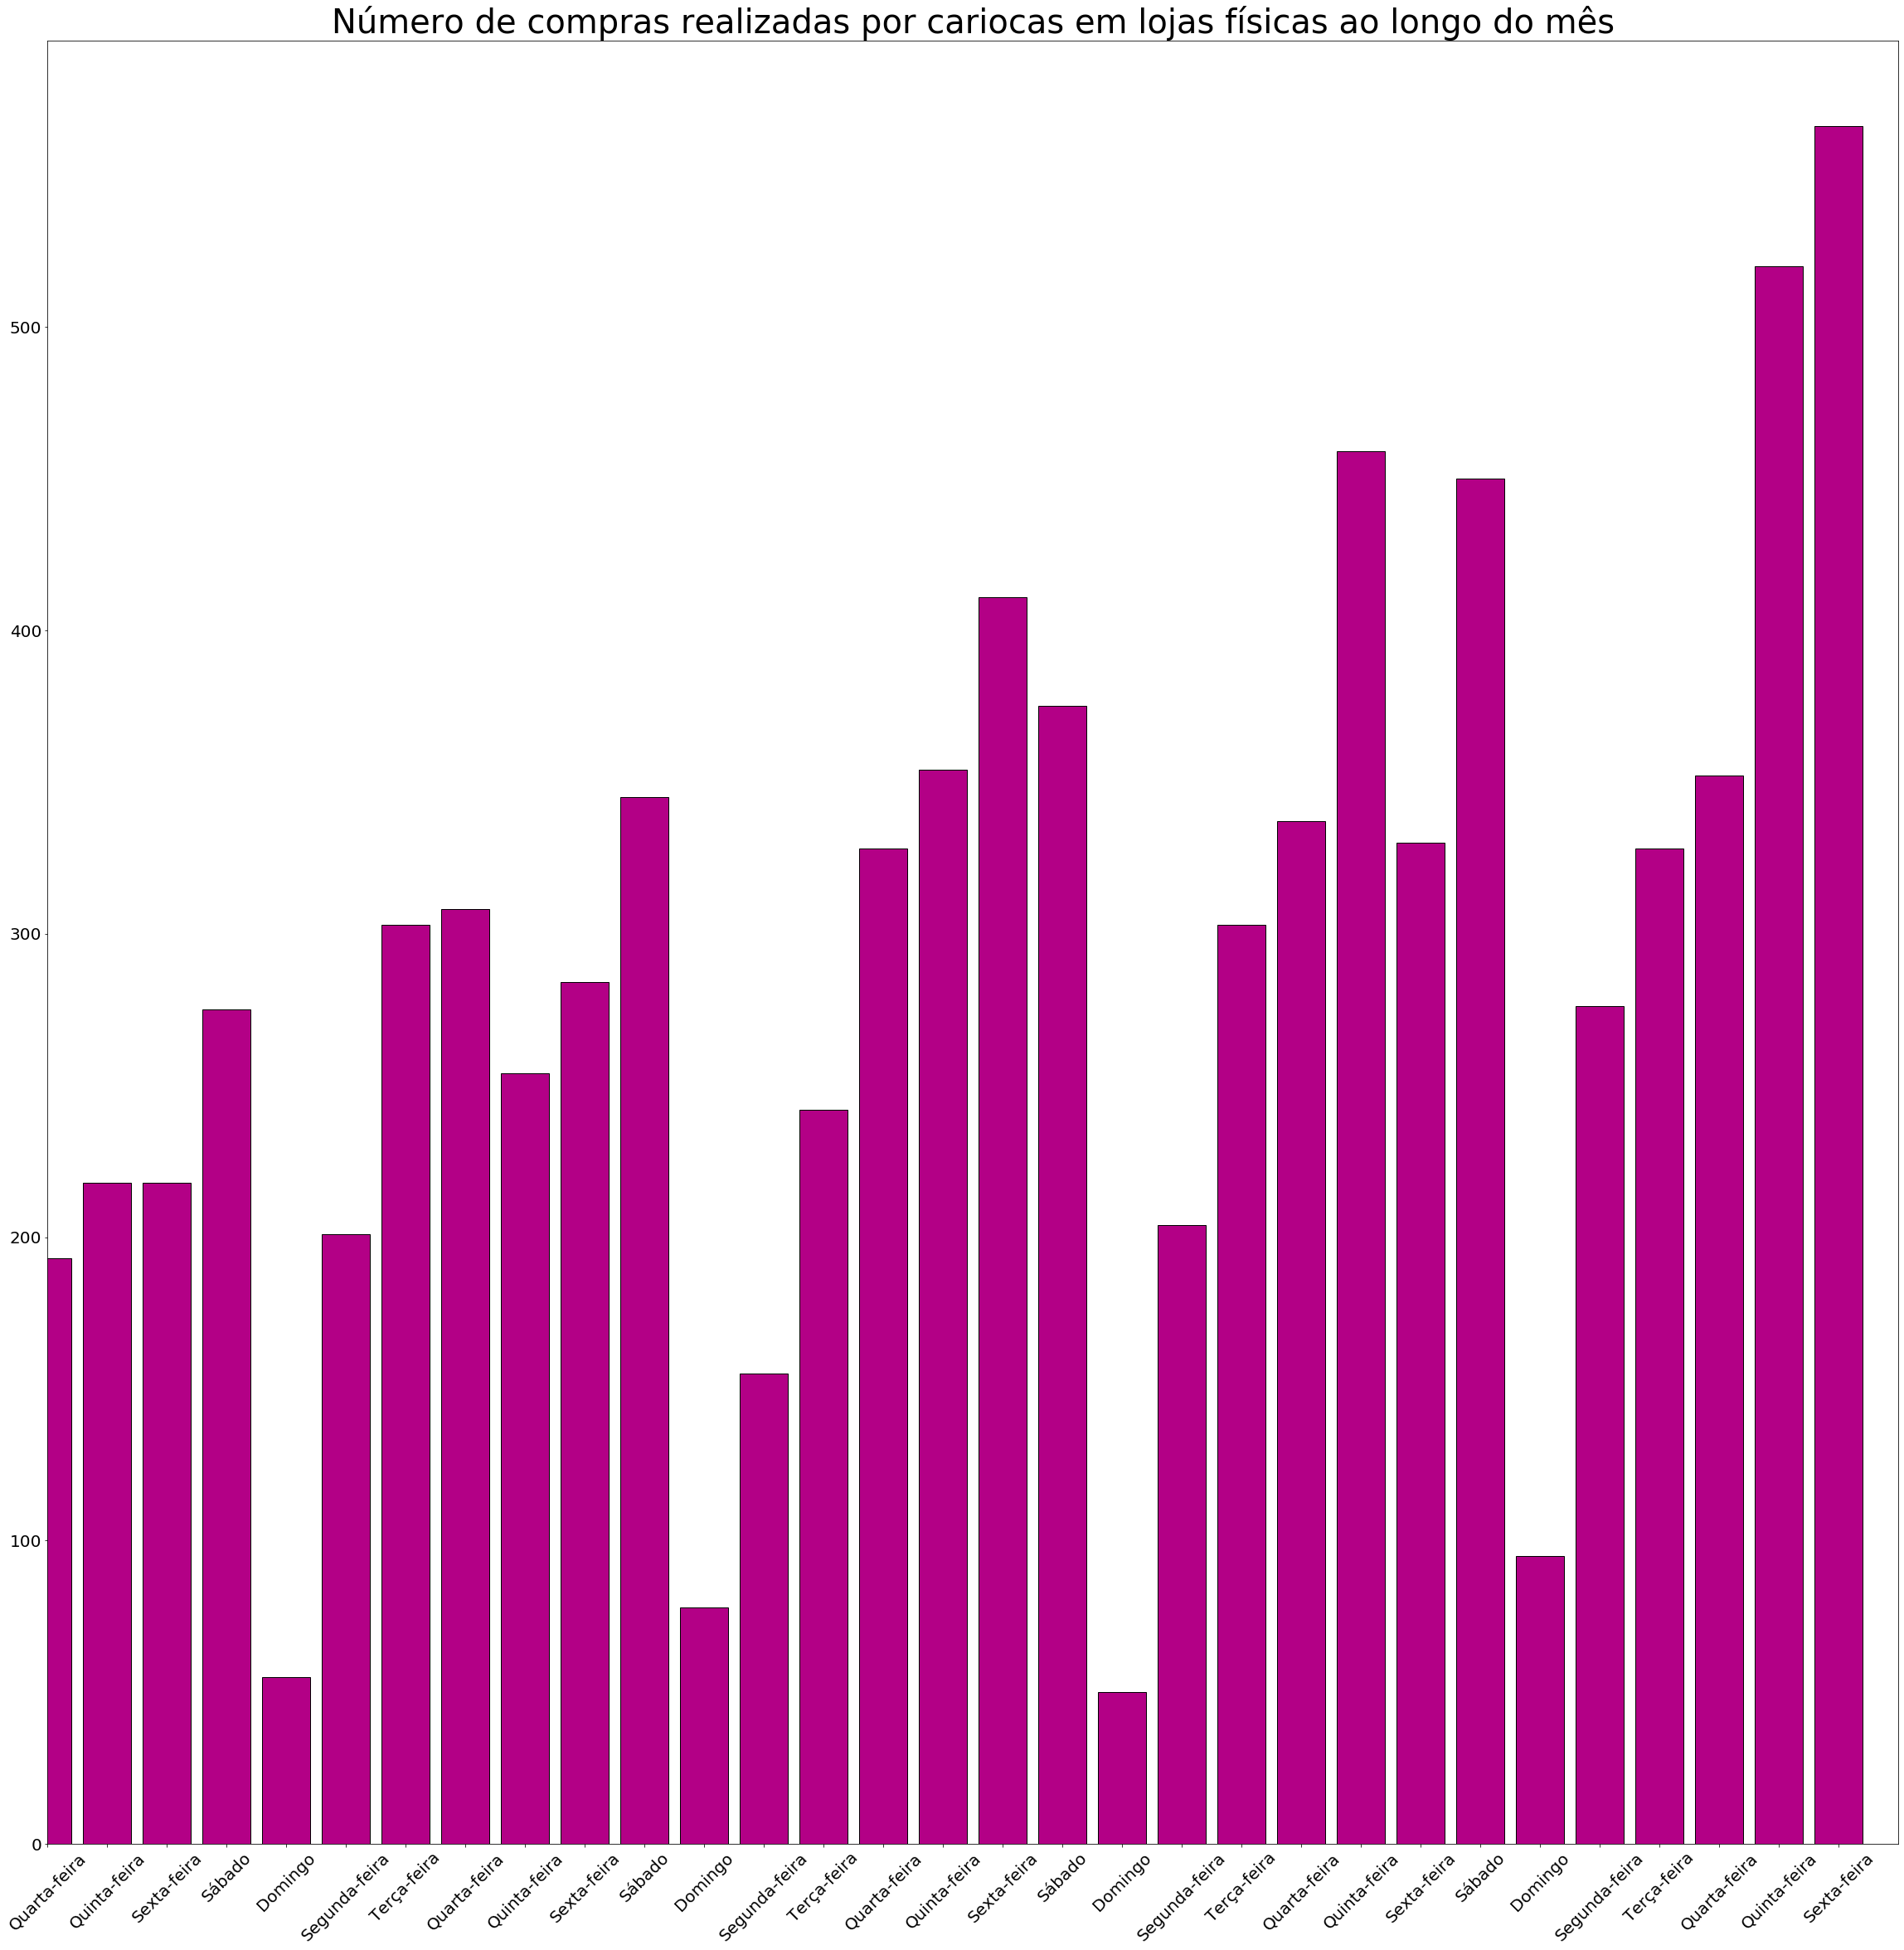

In [71]:
# Ainda analisando os cariocas, mas analisando o mês inteiro

g_income_rj_alldate_ofs = df_state_rj_ofs.groupby('date').count()

# Plot
my_ticks = ('Quarta-feira','Quinta-feira', 'Sexta-feira', 'Sábado','Domingo','Segunda-feira','Terça-feira')*5
fig= plt.figure(figsize=(40,40))
plt.bar(np.arange(31),g_income_rj_alldate_ofs['price'], color="#b30086", ec='black') 
plt.xticks(np.arange(0, 31, 1),my_ticks, rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0, 31)
plt.title("Número de compras realizadas por cariocas em lojas físicas ao longo do mês", fontsize=40)
plt.show() 

# Online Pageviews

Esta parte do código será referente à análise das páginas visitadas do ecommerce. Sendo assim, todas as variáveis criadas terminarão com a silga **onp** para facilitar a identificação e escrita do código.

In [90]:
# Descobrir o número de linhas do arquivo
number_lines_onp = 0
with open('online_pageviews/online_pageviews.json') as f:
    for line in f:
        number_lines_onp = number_lines_onp+1

print("O número de linhas presente no arquivo onp é igual a:", number_lines_onp)

O número de linhas presente no arquivo onp é igual a: 3452540


In [ ]:
# Abrindo o arquivo mas dividindo em diferentes dataframes (porque ele é muito grande)
data_ofs = pd.read_json('online_pageviews/online_pageviews.json', lines=True, dtype=False, chunksize=1)

df1_ofs = list()
df2_ofs = list()
df3_ofs = list()
df4_ofs = list()
df5_ofs = list()
df6_ofs = list()
df7_ofs = list()
]
i=0
for line in data:
    if(i>=0 and i<=500000):
        df1_ofs.append(pd.DataFrame(line))
    if(i>500000 and i<=1000000):
        df2_ofs.append(pd.DataFrame(line))
    if(i>1000000 and i<=1500000):
        df3_ofs.append(pd.DataFrame(line))
    if(i>1500000 and i<=2000000):
        df4_ofs.append(pd.DataFrame(line))
    if(i>2000000 and i<=2500000):
        df5_ofs.append(pd.DataFrame(line))
    if(i>2500000 and i<=3000000):
        df6_ofs.append(pd.DataFrame(line))
    if(i>3000000 and i<=3452540):
        df7_ofs.append(pd.DataFrame(line))
    i+=1
    if(i == 3500001):
        break

In [88]:
print(type(df6_ofs))

3452540


# Online Orders

Esta parte do código será referente à análise dos pedidos feitos no ecommerce. Sendo assim, todas as variáveis criadas terminarão com a silga **ono** para facilitar a identificação e escrita do código.

In [91]:
# Descobrir o número de linhas do arquivo
number_lines_ono = 0
with open('online_orders/online_orders.json') as f:
    for line in f:
        number_lines_ono = number_lines_ono+1

print("O número de linhas presente no arquivo ono é igual a:", number_lines_ono)

O número de linhas presente no arquivo ono é igual a: 12237


In [72]:
# Abrindo o arquivo json
df_ono = pd.read_json('online_orders/online_orders.json',lines=True,dtype=False)

# Criando uma coluna que será útil depois
df_ono['price_quantity'] = df_ono['price'] * df_ono['quantity'] 

# Verificação das primeiras linhas
df_ono.head(10)


,customer_id,date,deviceType,on_product_id,order_id,price,quantity,visitor_id,price_quantity
0,None,2018-08-01,desktop,323762666337343,363063373630306,839.0,1,3663323563643832383039356,839.0
1,63393337303931353431,2018-08-01,mobile,313562333039323,356664366366353,629.0,1,3430316531623964316332613,629.0
2,37653631373639353439,2018-08-01,desktop,383863346531623,313432656633333,219.0,1,3261343261306231336437393,219.0
3,65333830303066373165,2018-08-01,mobile,666136386663626,633236633438383,239.0,1,6437386532653732323563656,239.0
4,None,2018-08-01,desktop,626533383465323,623030326130383,69.0,1,6264656662326430346661616,69.0
5,None,2018-08-01,desktop,366464333539333,343136663661646,298.0,1,6638653965656263613238623,298.0
6,None,2018-08-01,desktop,373163626265643,353131646163336,598.0,1,6438323963376433356532633,598.0
7,61306161303630373135,2018-08-02,mobile,356466373137383,636536353265386,1798.0,1,3933383761663335353034373,1798.0
8,62633265623261666566,2018-08-02,mobile,383530353262626,363037313438636,428.0,1,6363363338623337663538353,428.0
9,35623131306438343161,2018-08-02,desktop,303936663162613,343238636534646,298.0,1,3761306638666637343734393,298.0


In [ ]:
# # Descobrindo o número de customer_id e de visitor_id existentes na tabela analisada
# unique_customer_id_ono = df_ono['customer_id'].unique()
# # print('Número de customer_id presentes no arquivo:',len(unique_customer_id_ono))

# unique_visitor_id_ono = df_ono['visitor_id'].unique()
# # print('Número de visitor_id presentes no arquivo:',len(unique_visitor_id_ono))


# df_customer_id_none_ono = df_ono.replace([None],0)

# # df_one_customer_test_ono = df_ono['customer_id']

# df_customer_id_none_ono = df_customer_id_none_ono.loc[df_customer_id_none_ono['customer_id'] != 0]

# df_customer_id_none_ono = df_customer_id_none_ono.loc[df_customer_id_none_ono['deviceType'] == 'desktop'] 

# # df_customer_id_none_ono.head(20)
# # df_customer_id_none_ono.tail(20)



# # # Descobrindo o número de estados e de store_id existentes na tabela analisada
# # unique_customer_id_ono = df_ono['customer_id'].unique()
# # print('Número de customer_id presentes no arquivo:',len(unique_customer_id_ono))

# # unique_visitor_id_ono = df_ono['visitor_id'].unique()
# # print('Número de visitor_id presentes no arquivo:',len(unique_visitor_id_ono))

# # Analisando quantos store_id existem por estado
# g_customer_id_ono = df_ono.groupby('date')
# g_customer_id_ono.apply(lambda s: len(s['visitor_id'].unique()))

# # 63393337303931353431 - mobile - 3430316531623964316332613

### Análise do faturamento

In [75]:
# Somando o faturamento das compras online 
income_ono = df_ono['price_quantity'].sum()

print("O faturamento das compras online nesse período foi de: R$", income_ono)

O faturamento das compras online nesse período foi de: R$ 5649323.0


### Análise do produto mais vendido

In [76]:
# Descobrindo o número total de produtos existentes na tabela analisada
unique_on_product_id_ono = df_ono['on_product_id'].unique()
print('Número de on_product_id presentes no arquivo:',len(unique_on_product_id_ono))

# Descobrindo quais as possíveis quantidades existentes na tabela analisada
unique_quantity_ono = df_ono['quantity'].unique()
print('Número de quantidades presentes no arquivo:',unique_quantity_ono)

df_product_ono = df_ono[['on_product_id', 'quantity']].copy()

# Sabendo que as possíveis quantidades são 1 2 e 3:

df_product_1_ono = df_product_ono.loc[df_product_ono['quantity'] == 1]
df_product_2_ono = df_product_ono.loc[df_product_ono['quantity'] == 2]
df_product_3_ono = df_product_ono.loc[df_product_ono['quantity'] == 3]

frames = [df_product_1_ono, df_product_2_ono, df_product_2_ono, df_product_3_ono, df_product_3_ono, df_product_3_ono]

df_product_new_ono = pd.concat(frames, ignore_index=True)
# df_product_new_ono.tail(100)

count = df_product_1_ono['on_product_id'].value_counts() 
# print(count) 

product_max_ono = count.index[0]

print("\nO produto mais comprado online foi o que possui on_product_id igual a:", product_max_ono)

Número de on_product_id presentes no arquivo: 2184
Número de quantidades presentes no arquivo: [1 2 3]

O produto mais comprado online foi o que possui on_product_id igual a: 626664333563363


### Análise sobre os cariocas gostarem de comprar no final de semana

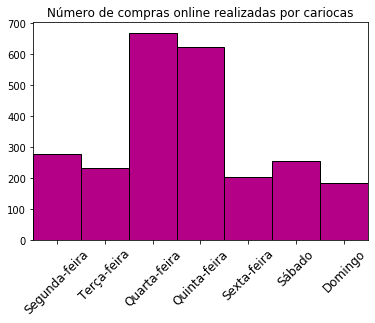

O número de compras online realizadas por cariocas nos finais de semana é igual a: 438
O número de compras online realizadas por cariocas nos dias de semana é igual a: 2000


In [77]:
# Ainda temos o dataframe df_state_rj_ofs que é relacionado às compras em lojas físicas no estado do RJ
# Como o customer_id é igual tanto em lojas físicas como em compras online, podemos usar essa informação
# Primeiro temos que tirar os nulos para não dar problema - vamos perder um pouco de informação -- 233 pessoas

df_state_rj_ofs_withoutnone = df_state_rj_ofs.replace([None],0)
df_state_rj_ofs_withoutnone = df_state_rj_ofs_withoutnone.loc[df_state_rj_ofs_withoutnone['customer_id'] != 0]

# Retirar as colunas que não importam para esse caso e deixar os custumer_id únicos
df_state_rj_ofs_withoutnone = df_state_rj_ofs_withoutnone.drop(['date', 'off_product_id', 'price', 'quantity', 'sale_id', 
                                  'store_id', 'weekday'], axis=1)
unique_df_state_rj_ofs = df_state_rj_ofs_withoutnone['customer_id'].unique()

# Juntando as informações
df_state_rj_ono = pd.merge(df_state_rj_ofs_withoutnone, df_ono, how='inner', left_on='customer_id', right_on='customer_id')
df_state_rj_ono.head()

# Criando mais uma coluna referente ao dia da semana
df_state_rj_ono['weekday'] = df_state_rj_ono['date'].dt.dayofweek

# Plots
bins = range(8)
plt.hist(df_state_rj_ono['weekday'], bins=bins, color="#b30086", ec='black') 
plt.xticks(np.arange(0.5, 7, 1),('Segunda-feira','Terça-feira','Quarta-feira','Quinta-feira', 
                                  'Sexta-feira', 'Sábado','Domingo'), rotation=45, fontsize=12)
plt.xlim(0, 7)
plt.title("Número de compras online realizadas por cariocas")
plt.show()  

# Analisar os dias da semana
df_state_rj_weekend_ono = df_state_rj_ono.loc[df_state_rj_ono['weekday'] > 4]
df_state_rj_week_ono = df_state_rj_ono.loc[df_state_rj_ono['weekday'] < 5]

print("O número de compras online realizadas por cariocas nos finais de semana é igual a:",df_state_rj_weekend_ono.shape[0])
print("O número de compras online realizadas por cariocas nos dias de semana é igual a:",df_state_rj_week_ono.shape[0])

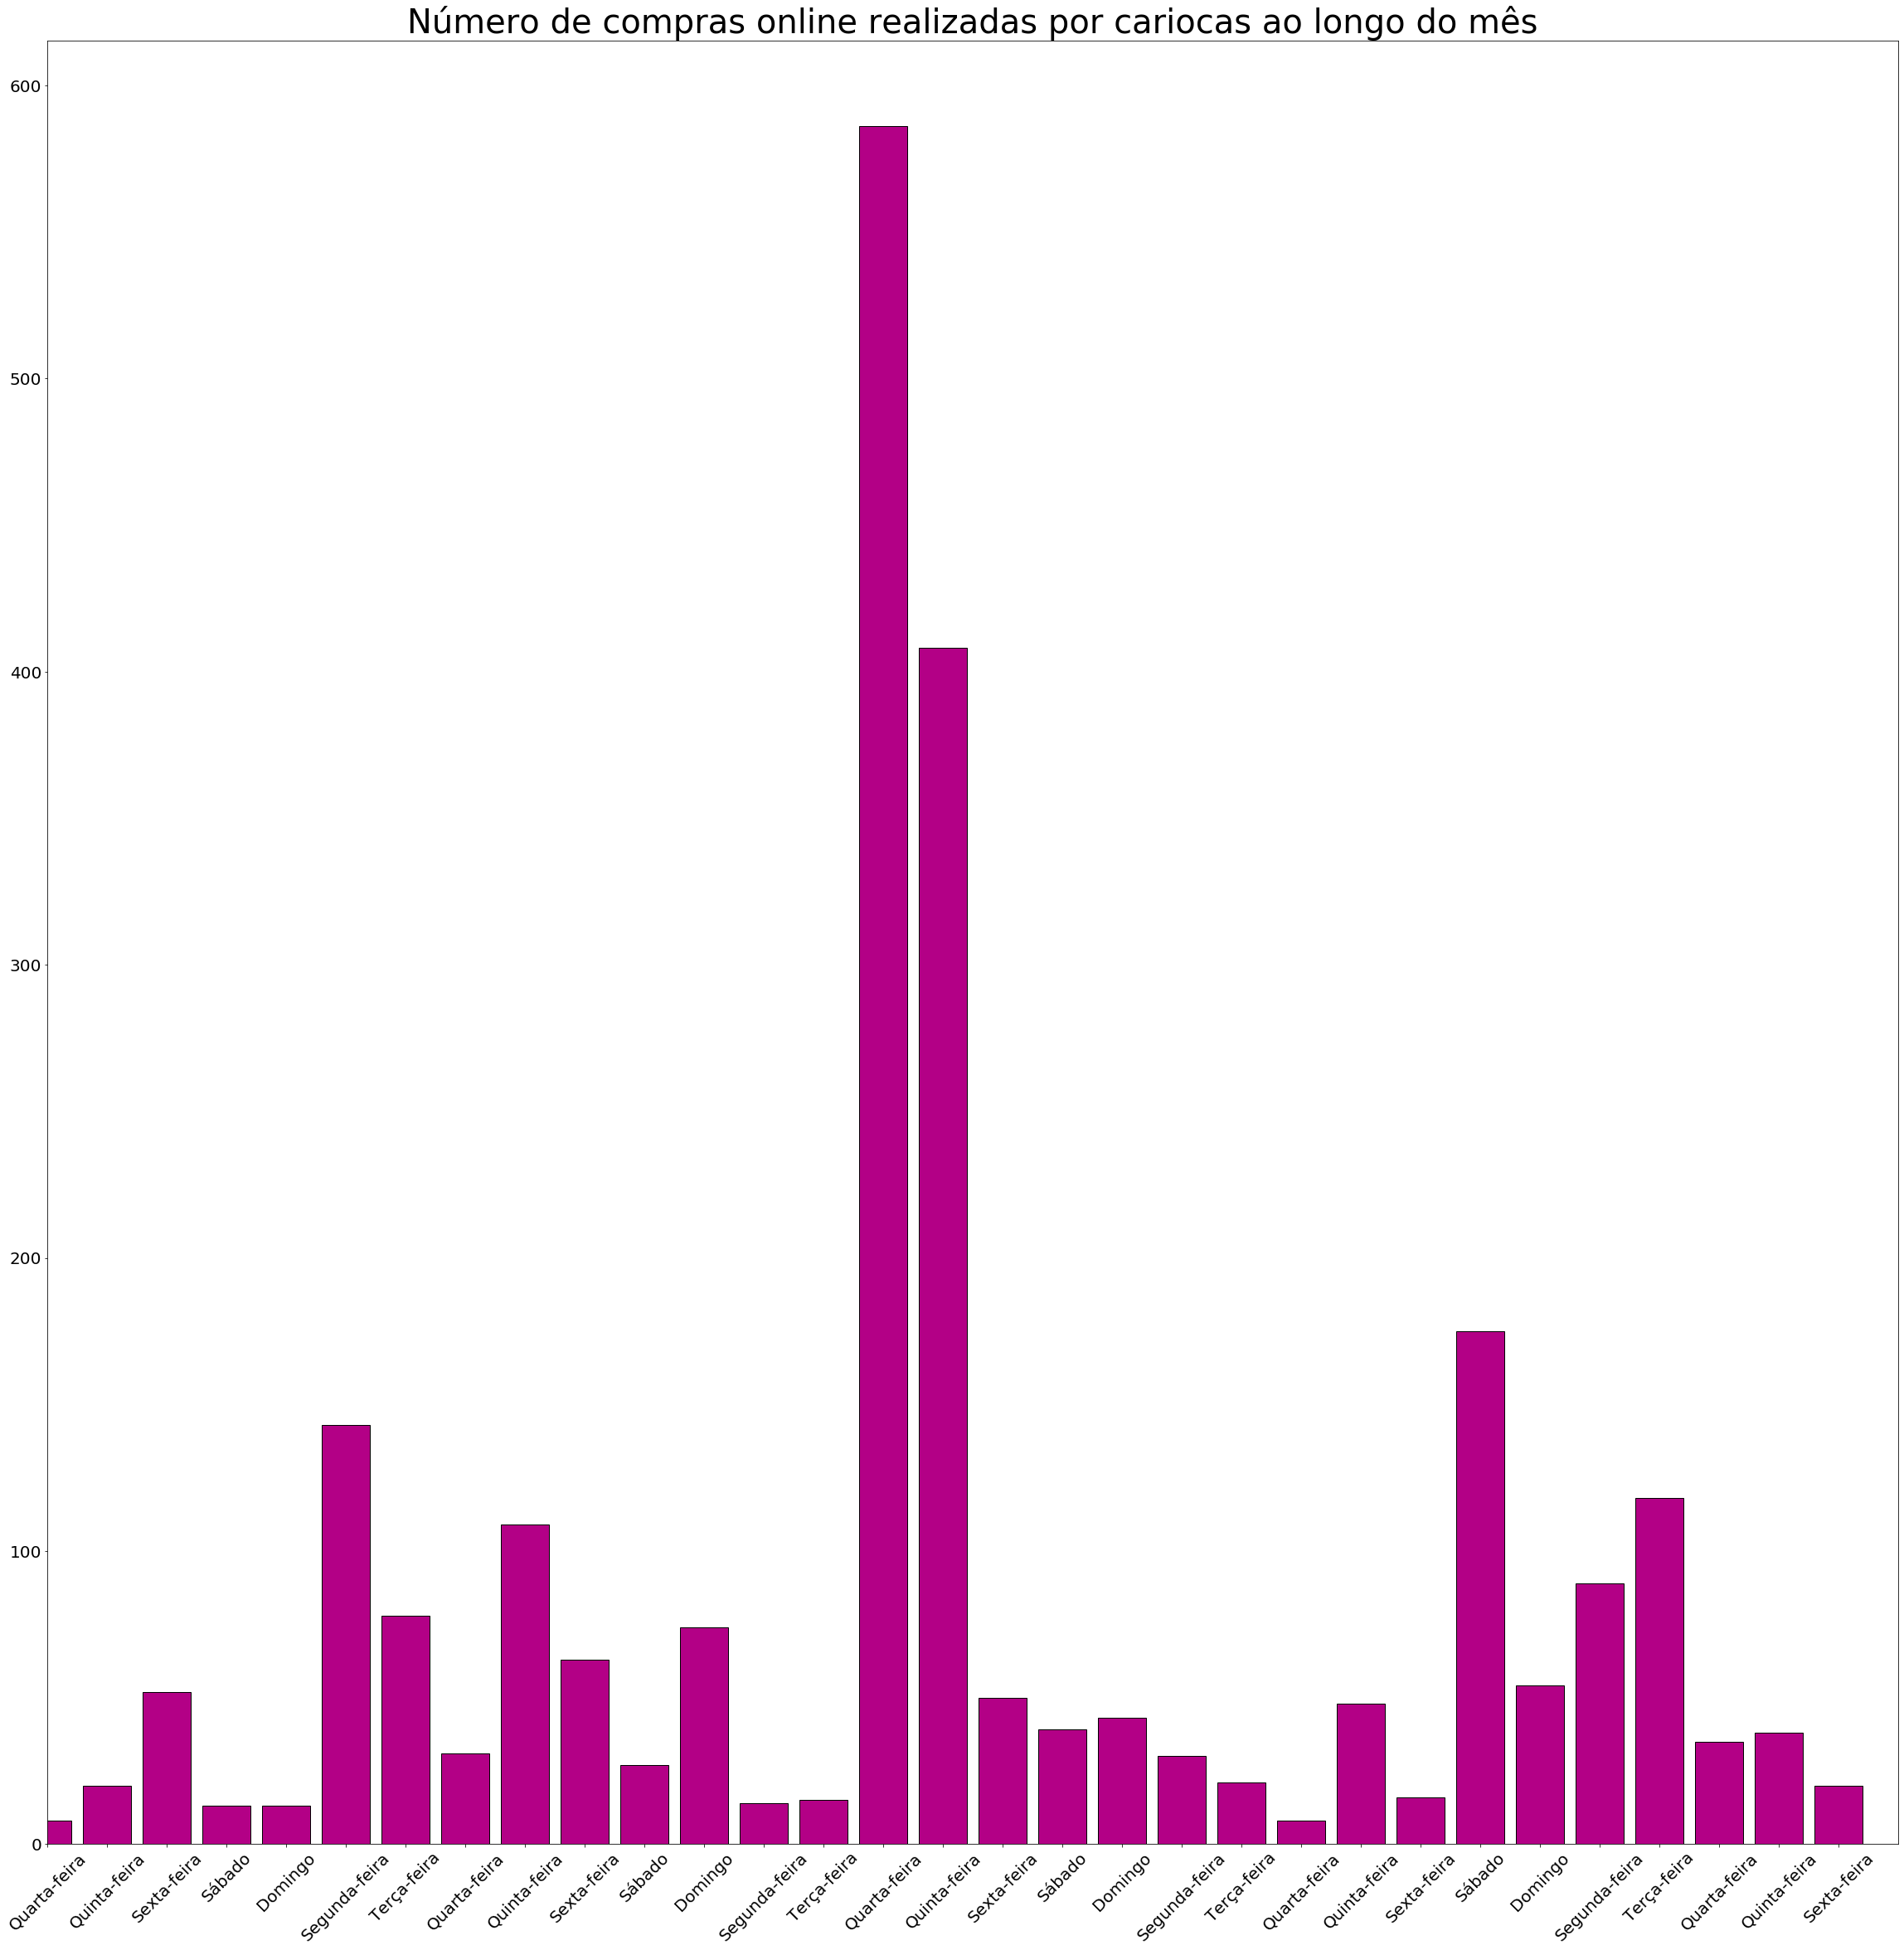

In [78]:
# Ainda analisando os cariocas, mas analisando o mês inteiro
g_income_rj_alldate_ono = df_state_rj_ono.groupby('date').count()

# Plots
my_ticks = ('Quarta-feira','Quinta-feira', 'Sexta-feira', 'Sábado','Domingo','Segunda-feira','Terça-feira')*5
fig= plt.figure(figsize=(40,40))
plt.bar(np.arange(31),g_income_rj_alldate_ono['price'], color="#b30086", ec='black') 
plt.xticks(np.arange(0, 31, 1),my_ticks, rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0, 31)
plt.title("Número de compras online realizadas por cariocas ao longo do mês", fontsize=40)
plt.show() 

## Análises Gerais

### Análise do Faturamento

In [79]:
income_total = income_ofs + income_ono

print("O faturamento total neste período foi de: R$", income_total)

O faturamento total neste período foi de: R$ 19552328.32


### Análise sobre a compra na loja física após a escolha online
